In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon

In [20]:
data_arr_mun = geopandas.read_file('data_geom/arrond_mun/ARRONDISSEMENT_MUNICIPAL.shp')
data_arr_mun = data_arr_mun[['ID', 'NOM', 'NOM_M', 'INSEE_COM', 'POPULATION', 'geometry']]

In [21]:
data_commune = geopandas.read_file('data_geom/commune/COMMUNE.shp')
data_commune = data_commune[['ID', 'NOM', 'NOM_M', 'INSEE_COM', 'geometry']]

In [4]:
data_complete = data_commune.append(data_arr_mun)

C:\Users\theop\AppData\Local\Temp\ipykernel_28448\2743016635.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_complete = data_commune.append(data_arr_mun)


In [22]:
data_migration = pd.read_csv('data_migration/base-flux-mobilite-residentielle-2019.csv', sep=';').astype('str')
data_migration = data_migration[data_migration['DCRAN']=='99999']

C:\Users\theop\AppData\Local\Temp\ipykernel_28448\168447941.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_migration = pd.read_csv('data_migration/base-flux-mobilite-residentielle-2019.csv', sep=';').astype('str')


<Axes: >

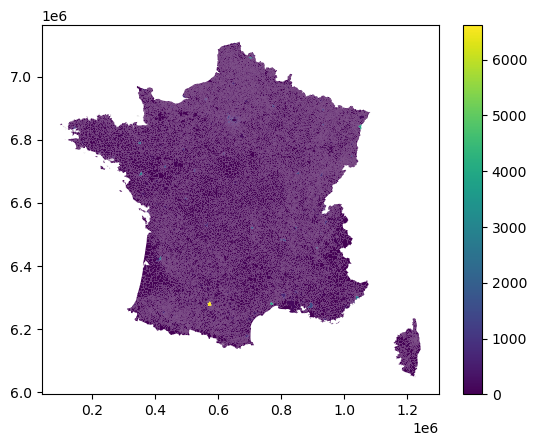

In [19]:
carte = geopandas.GeoDataFrame(data_migration.merge(data_complete, left_on='LIBGEO', right_on='NOM', how='outer'), geometry='geometry')
carte = carte[['CODGEO', 'NBFLUX_C19_POP01P', 'NOM', 'ID', 'INSEE_COM', 'geometry']]
carte['NBFLUX_C19_POP01P'] = carte['NBFLUX_C19_POP01P'].astype(float)
carte['NBFLUX_C19_POP01P'] = carte['NBFLUX_C19_POP01P'].fillna(0.)
carte.plot('NBFLUX_C19_POP01P', legend=True)